# Credit Risk Prediction

## Description

Credit scoring is the process through which financial institutions assess the creditworthiness of individuals or businesses. This code is designed to classify credit risk using a dataset containing records of 1000 bank customers. Its purpose is to assist a bank manager in predicting the credit risk of potential customers, thereby enabling more informed decisions when considering loan applications.

## Data Analysis and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
credit_df = pd.read_excel('data/data-CreditRisk.xls', 'TrainingData')

Text(0.5, 1.0, 'Total of Customer Risks')

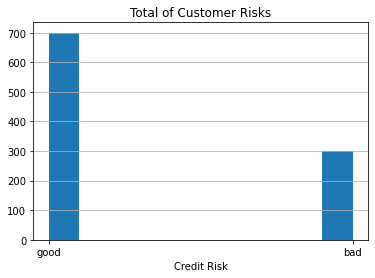

In [3]:
credit_df['Risk'].hist()
plt.xlabel('Credit Risk')
plt.grid(axis='x')
plt.title("Total of Customer Risks")

Most of the existing customers are 'good' customers. The histogram plot, created using the function <i>hist</i>, presents the number of 'good' and 'bad' customers.

In [4]:
credit_df.groupby(['Sex']).CreditAmount.mean()

Sex
female    2877.774194
male      3456.321689
Name: CreditAmount, dtype: float64

Male customers have a higher CreditAmount on average. By using the <i>mean</i> function, we can see that male customers have an average CreditAmount of 3456, whereas female customers have an average CreditAmount of 2878.

Text(0, 0.5, 'Housing Type')

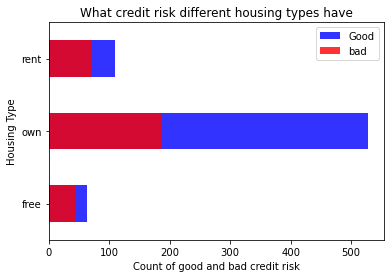

In [5]:
df_good = credit_df.Housing[credit_df.Risk == 'good'].value_counts().sort_index()
df_bad = credit_df.Housing[credit_df.Risk == 'bad'].value_counts().sort_index()

df_good.plot(kind='barh', alpha = 0.8, color = 'b')
df_bad.plot(kind='barh', alpha = 0.8, color = 'r')

plt.title("What credit risk different housing types have")
plt.legend(['Good', 'bad'])
plt.xlabel("Count of good and bad credit risk")
plt.ylabel("Housing Type")

Customers with their own housing type are most likely to have good credits. The graph above shows this, which was created by counting the number of good and bad credit risks, sorting them to their appropriate housing type, and plotting them onto the horizontal bar graph.

In [6]:
credit_df.isnull().sum()

ID                  0
Age                 0
Sex                 0
Job                 4
Housing             0
SavingAccounts    183
CheckAccount      394
CreditAmount        3
Duration            5
Purpose             0
Risk                0
dtype: int64

In [7]:
job = credit_df['Job'].mean()
credit_df['Job'].fillna(job, inplace=True)

In [8]:
duration = credit_df['Duration'].mean()
credit_df['Duration'].fillna(duration, inplace=True)

In [9]:
credit = credit_df['CreditAmount'].mean()
credit_df['CreditAmount'].fillna(credit, inplace=True)

In [10]:
convert_saving = credit_df.drop(columns=['SavingAccounts'])
convert_saving['SavingAccounts'] = credit_df['SavingAccounts'].map({'little': 0, 'moderate': 1, 'rich': 2, 'quite rich': 3})
credit_df = convert_saving

saving = credit_df['SavingAccounts'].mean()
credit_df['SavingAccounts'].fillna(saving, inplace=True)

The code cells above use the mean() function to find the mean Job, Duration, CreditAmount, and SavingAccounts. They then fill their corresponding null records with their mean value. I used the <i>mean()</i> function because I feel it is representable for the dataset as it is just an average value of the existing data. In order to use the <i>mean()</i> function for SavingAccounts, I had to convert its values first from strings to integers as the <i>mean()</i> function doesnt work on strings. I converted its values 'little', 'rich', and 'quite rich' to 0, 1, and 2.

In [11]:
credit_df = credit_df.drop(columns=['CheckAccount'])

There are lots of missing values from the CheckAccount column (almost 40%) and so it wouldn't be very reliable to fill the null values using something such as the <i>mean()</i> function, therefore I dropped it from the dataset.

In [12]:
credit_df.isnull().sum()

ID                0
Age               0
Sex               0
Job               0
Housing           0
CreditAmount      0
Duration          0
Purpose           0
Risk              0
SavingAccounts    0
dtype: int64

The code above shows that there are no null values in the dataset anymore.

In [13]:
credit_df = credit_df.drop(['Purpose', 'ID', 'Job'], axis=1)

I have dropped Purpose and Job as it doesnt seem like they would have much effect on credit risk. I also dropped ID because panda automatically gives each record an ID number, and so there were two ID columns.

In [14]:
convert_risk = credit_df.drop(columns=['Risk'])
convert_risk['Risk'] = credit_df['Risk'].map({'bad': 0, 'good': 1})
credit_df = convert_risk

In [15]:
convert_housing = credit_df.drop(columns=['Housing'])
convert_housing['Housing'] = credit_df['Housing'].map({'free': 0, 'rent': 1, 'own': 2})
credit_df = convert_housing

In [16]:
convert_sex = credit_df.drop(columns=['Sex'])
convert_sex['Sex'] = credit_df['Sex'].map({'male': 0, 'female': 1})
credit_df = convert_sex

The data for Risk, Housing, and Sex aren't numbers which could create issues when using it in the machine learning models, as they may have trouble processing strings. Therefore, I have used the <i>map()</i> function to map its data from strings to numerical values.

For Risk, I have mapped 'bad' to 0 and 'good' to 1.

For Housing, I have mapped 'free' to 0, 'rent' to 1, and 'own' to 2.

For Sex, I have mapped 'male' to 0 and 'female' to 1.

In [17]:
credit_df

,Age,CreditAmount,Duration,SavingAccounts,Risk,Housing,Sex
0,67,1169.0,6.000000,0.474908,1,2,0
1,22,5951.0,48.000000,0.000000,0,2,1
2,49,2096.0,12.000000,0.000000,1,2,0
3,45,7882.0,42.000000,0.000000,1,0,0
4,53,4870.0,24.000000,0.000000,0,0,0
...,...,...,...,...,...,...,...
995,31,1736.0,20.896482,0.000000,1,2,1
996,40,3857.0,30.000000,0.000000,1,2,0
997,25,1295.0,12.000000,0.000000,0,1,1
998,25,8072.0,30.000000,0.474908,1,2,0


## Artificial Neural Network (ANN)

In [18]:
target = credit_df['Risk']
data = credit_df[['Age', 'Sex', 'CreditAmount', 'SavingAccounts', 'Housing', 'Duration']]

In [19]:
data.max()-data.min()

Age                  56.0
Sex                   1.0
CreditAmount      18174.0
SavingAccounts        3.0
Housing               2.0
Duration             68.0
dtype: float64

This is to prepare the data for the machine learning models.

I have set the target to 'Risk' as this is what we are trying to determine, and the data as the remaining columns input features which will be used to help to determine the target.

All of their types are integers, and their ranges can be seen above. To get the ranges I used the <i>max</i> and <i>min</i> functions to get the maximum and minimum values from the data where I then subtracted the minimum from the maximum.

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.3)
ann1 = MLPClassifier(hidden_layer_sizes=(5), max_iter=3000)
ann1.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=5, max_iter=3000)

The code above builds and trains ann1. This code uses the <i>train_test_split</i> function to split the data, where 70% is used for training and the remaining 30% is used to test the training data.

The code then creates the decision tree and calls it 'ann1', where it gives it one hidden layer of 5 neurons and 3000 iterations.

Finally, the code uses a function called <i>fit</i> to train ann1 for the input against the accuracy.

In [21]:
from sklearn import metrics
predict_x = ann1.predict(train_x)
print('The training accuracy is', metrics.accuracy_score(train_y, predict_x))

The training accuracy is 0.6585714285714286


The code above uses the function <i>predict</i> to predict the training input (predict_x) by using the training dataset (test_x). Then, we use <i>metrics.accuracy_score</i> to compare predict_x with the actual input (train_y) and see how accurate it is. The training accuracy is 65.9%.

In [22]:
predict_y = ann1.predict(test_x)
print('The testing accuracy is', metrics.accuracy_score(test_y, predict_y))

The testing accuracy is 0.65


The code above uses the function <i>predict</i> to predict the testing output (predict_y) by using the test data set (test_x). Then, we use <i>metrics.accuracy_score</i> to compare predict_y with the actual output (test_y) and see how accurate it is. The testing accuracy is 65%.

65.9% and 65% are satisfactory, so I would say ann1 is okay for classifying new customers.

In [23]:
def cf_matrix(mat, t_name):
    figure, ax = plt.subplots()
    image = ax.imshow(mat)
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)
    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="white")
    plt.ylabel('actual')
    plt.xlabel('predicted')

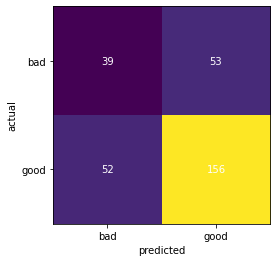

In [24]:
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(test_y, predict_y)
target_labels = ['bad', 'good']
cf_matrix(confusion_m, target_labels)

The confusion matrix shows that ann1 is much more accurate at predicting the customers with 'good' credit risk.

The model is 156/(156+53)=74.6% accurate at calculating customers with 'good' credit risk.

It is 39/(39+52)=42.9% accurate at calculating customers with 'bad' credit risk.

Altogether, it is 156+39/(156+39+53+52)=65% accurate at calculating the credit risk of a customer. I would say ann1 is satisfactory at predicting 'good' and 'bad' customers as 65% is somewhat accurate.

## Second Artificial Neural Network (ANN)

In [28]:
from sklearn.neural_network import MLPClassifier

ann2 = MLPClassifier(hidden_layer_sizes=(5,7,8), max_iter=3000)
ann2.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(5, 7, 8), max_iter=3000)

The differences I have made in ann2 are the hidden layers and neurons. It has 3 hidden layers with 5, 7, and 10 neurons. This means that ann2 is now more complex than ann1 with varying neurons in its hidden layers and so there will be less generalisation of the data.

In [29]:
predict_x = ann2.predict(train_x)
print('The training accuracy is', metrics.accuracy_score(train_y, predict_x))

The training accuracy is 0.7157142857142857


In [30]:
predict_y = ann2.predict(test_x)
print('The testing accuracy is', metrics.accuracy_score(test_y, predict_y))

The testing accuracy is 0.68


I would say ann2 is an acceptable model because 71.6% and 68% are somewhat accurate.

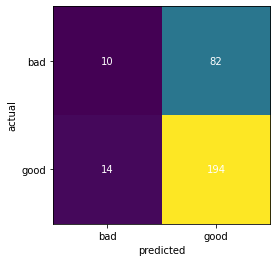

In [31]:
confusion_m2 = confusion_matrix(test_y, predict_y)
target_labels = ['bad', 'good']
cf_matrix(confusion_m2, target_labels)

The confusion matrix shows that ann2 is much more accurate at predicting the customers with 'good' credit risk.

The model is 194/(194+82)=70.3% accurate at calculating customers with 'good' credit risk.

It is 10/(14+10)=41.7% accurate at calculating customers with 'bad' credit risk.

Altogether, it is 194+10/(194+14+10+82)=68% accurate at calculating the credit risk of a customer. I would say ann2 is okay at predicting 'good' or 'bad' customers as 68% is somewhat accurate.

ann2 was less accurate at calculating 'good' customers with 70.3% compared to ann1's 74.6%, however ann1 was slightly better at calculating 'bad' customers with an accuracy of 42.9% compared to ann2's 41.7%. Altogether, ann2's overall acurracy was higher with 68% compared to ann1's 65%. Because of these reasons, I consider ann2 the better neural network.

In [32]:
from sklearn.model_selection import cross_val_score
print('The accuracy for ann1 is', cross_val_score(ann1, data, target, cv=10, scoring='accuracy').mean())

The accuracy for ann1 is 0.6209999999999999


In [33]:
print('The accuracy for ann2 is', cross_val_score(ann2, data, target, cv=10, scoring='accuracy').mean())

The accuracy for ann2 is 0.651


The code above uses k-fold cross validation to predict how accurate ann1 and ann2 is. It uses the <i>cross_val_score</i> function to split the data into 10 folds. It then creates and trains 10 decision trees against the target. The parameter <i>scoring='accuracy'</i> means that the code will focus on giving us an accurate result. The accuracy for all 10 models are then averaged.

According to the k-fold cross validation, ann2 is better than ann1 as it has an accuracy of 65.1%, 3% more than ann1's accuracy of 62.1%.

## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=3).fit(train_x, train_y)

In [35]:
predict_x = dt1.predict(train_x)
print('The training accuracy is', metrics.accuracy_score(train_y, predict_x))

The training accuracy is 0.7371428571428571


In [36]:
predict_y = dt1.predict(test_x)
print('The testing accuracy is', metrics.accuracy_score(test_y, predict_y))

The testing accuracy is 0.7066666666666667


The training accuracy of dt1 is 73.7%.
I would say this is a good accuracy.

The testing accuracy is also 70.1%.
I would say this is an acceptable accuracy.

I would say dt1 is a reasonable model for classifying new customers as 73.7% and 70.1% are good numbers.

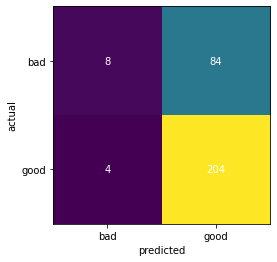

In [38]:
cm = confusion_matrix(test_y, predict_y)
cf_matrix(cm, target_labels)

This model shows that dt1 is good at calculating customers with 'good' credit risk, as that 204/(204+84)=70.8% accurate at calculating customers with 'good' credit risk.

dt1 is 8/(4+8)=67% accurate at calculating customers with 'bad' credit risk.

Altogether, it is 204+8/(204+4+84+8)=70.7% accurate at calculating the credit risk of a customer. I would say dt1 is good at predicting 'good' customers, but not as good at calculating 'bad' customers.

## Second Decision Tree

In [39]:
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(data.drop(columns=['Duration']), target, test_size=0.3)
dt2 = DecisionTreeClassifier(max_depth=3).fit(train_x_2, train_y_2)

print('\nThe accuracy without Age is', cross_val_score(dt2, data.drop(columns=['Age']), target, cv=10, scoring='accuracy').mean())
print('\nThe accuracy without Sex is', cross_val_score(dt2, data.drop(columns=['Sex']), target, cv=10, scoring='accuracy').mean())
print('\nThe accuracy without CreditAmount is', cross_val_score(dt2, data.drop(columns=['CreditAmount']), target, cv=10, scoring='accuracy').mean())
print('\nThe accuracy without SavingAccounts is',cross_val_score(dt2, data.drop(columns=['SavingAccounts']), target, cv=10, scoring='accuracy').mean())
print('\nThe accuracy without Housing is',cross_val_score(dt2, data.drop(columns=['Housing']), target, cv=10, scoring='accuracy').mean())


The accuracy without Age is 0.712

The accuracy without Sex is 0.704

The accuracy without CreditAmount is 0.7060000000000001

The accuracy without SavingAccounts is 0.6950000000000001

The accuracy without Housing is 0.7030000000000001


I used the <i>train_test_split</i> function on the data, but dropping 'Duration' this time. This function splits the data, where 70% is used for training and the remaining 30% is used to test the training data. I created a new decision tree called dt2, with a depth of 3, and used the <i>fit</i> function to train dt2 for the input against the accuracy.

Next, I used k-fold cross validation to find which input feature affected dt2 the most. I dropped an input feature, then used <i>cross_val_score</i> to see what the accuracy of the decision would be now that it is missing that input feature. I repeated this for every input feature.

I have found that dropping the 'SavingAccounts' input feature affected the accuracy the most, bringing it down to 69.5%.

In [40]:
predict_y_2 = dt2.predict(test_x_2)
print(metrics.accuracy_score(test_y_2, predict_y_2))

0.6933333333333334


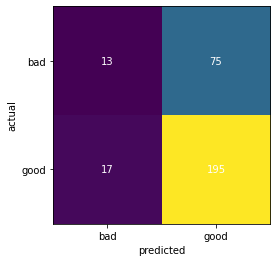

In [42]:
cm2 = confusion_matrix(test_y_2, predict_y_2)
cf_matrix(cm2, target_labels)

This model shows that dt2 is 195/(195+75)=72.2% accurate at calculating customers with 'good' credit risk. This accuracy is okay.

dt2 is 13/(13+17)=43.3% accurate at calculating customers with 'bad' credit risk. This accuracy isn't good.

Altogether, it is 195+13/(195+13+75+17)=69.3% accurate at calculating the credit risk of a customer. I would say dt2 is alright at predicting 'good' or 'bad' customers as 69.3% is reasonable.

dt1's accuracy for predicting 'bad' customers is 67%, much higher than dt1's 43.3%.

Bank managers would prefer dt1, as it has a higher overall accuracy (70.7%) than dt2 (69.3%). dt1 also has a much higher accuracy of 67% for predicting 'bad' customers compared to dt2's 43.3%. However, it is important to note that dt2 does have a slightly higher accuracy of 72.2% than dt1's 70.8% for 'good' customers.

## Tuning Depth of Best Decision Tree

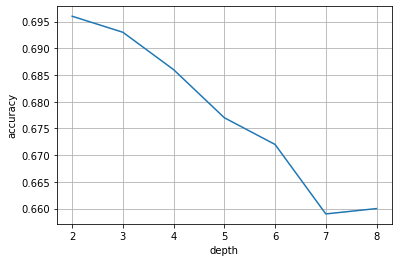

In [51]:
depth_scores = []
depth_range = range(2,9)
for d in depth_range:
    dt2 = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(dt2, data.drop(columns=['Duration']), target, cv=10, scoring='accuracy')
    depth_scores.append(scores.mean())
acc_dt = max(depth_scores)

plt.plot(depth_range, depth_scores)
plt.xticks(depth_range)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(axis='both')

The tree depth which I would use is depth 2 or 3. This can be seen by the above plot, where depth 2 illustrates the highest accuracy.

## Decision Making with Best Decision Tree

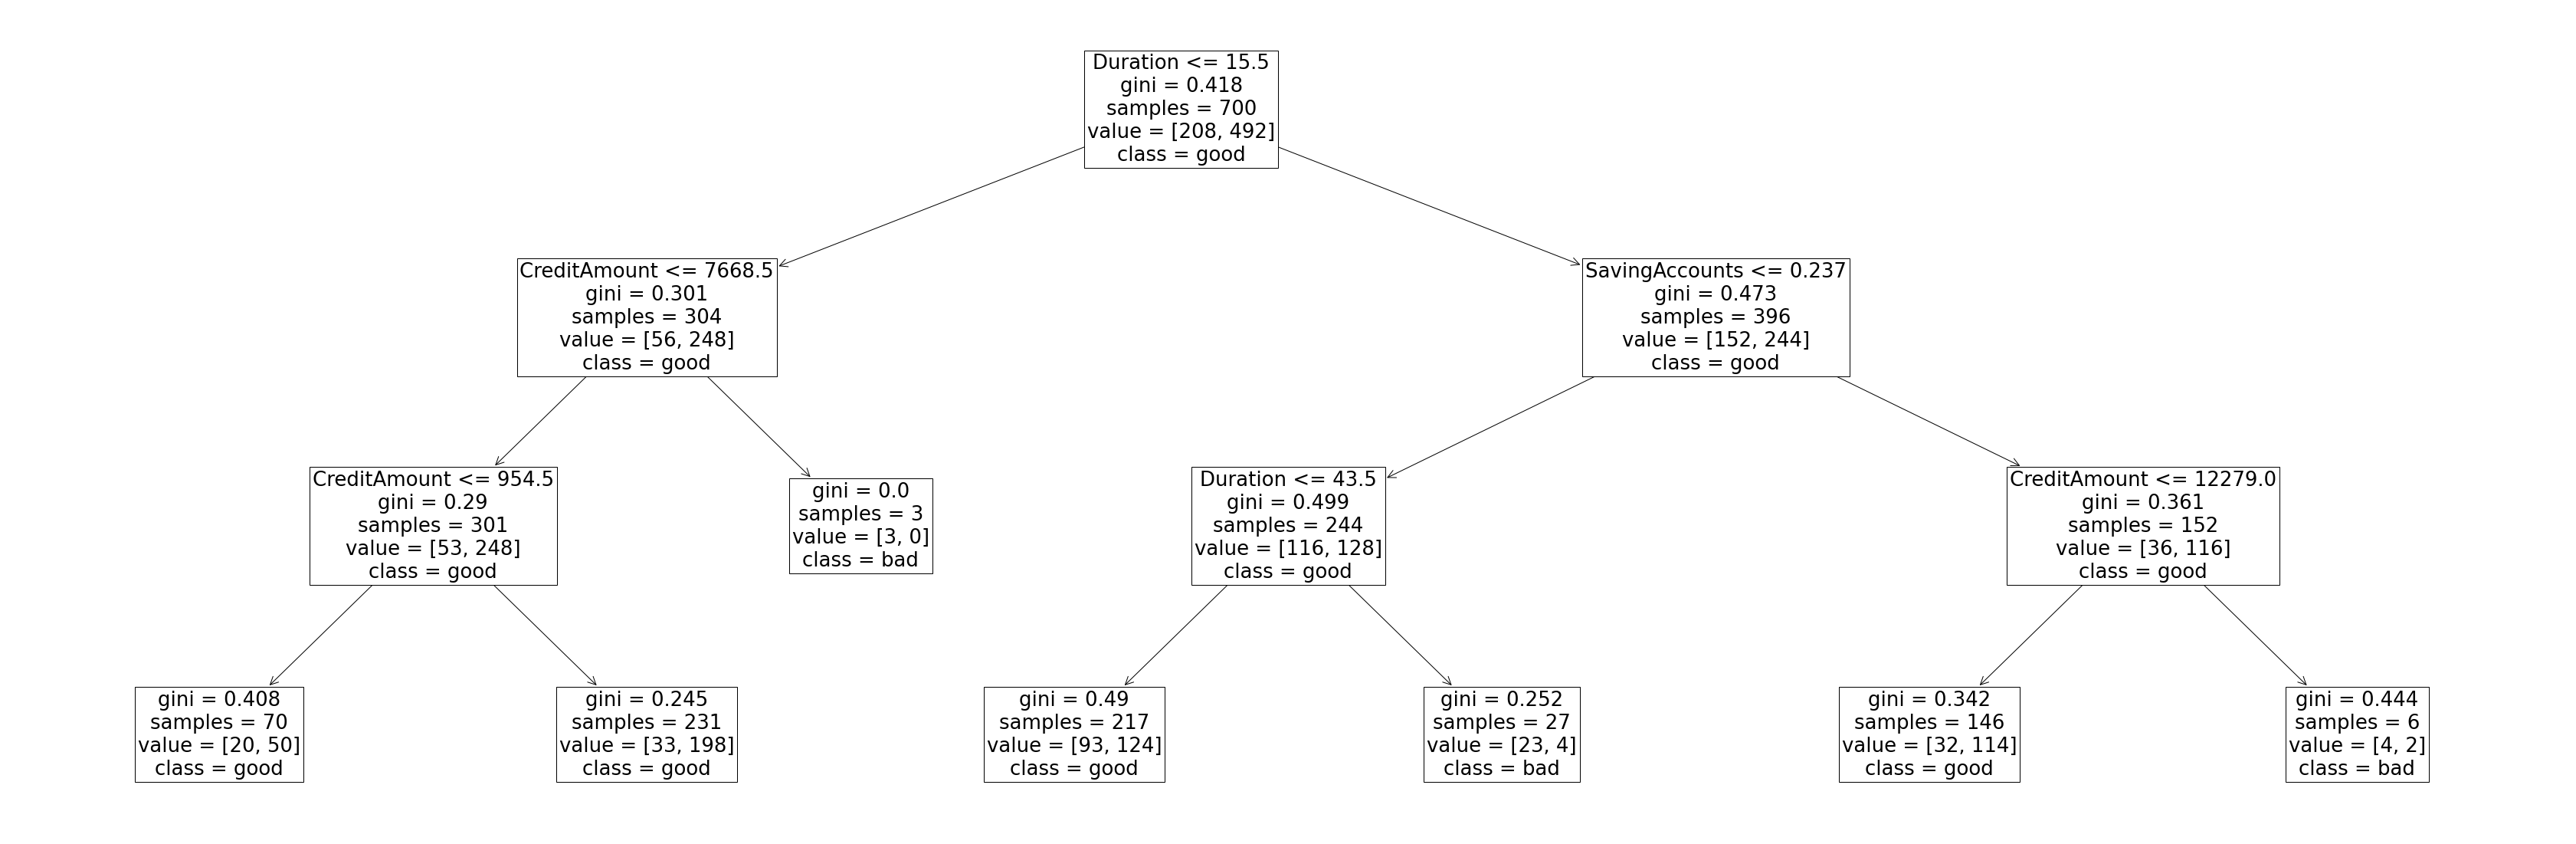

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
target_labels = ['bad', 'good']
plt.figure(figsize=(60,20))
tree_plot = tree.plot_tree(dt1, feature_names = data.columns, class_names=target_labels, fontsize=26)
plt.show()

## Example Case
A new customer of age 40 with a CreditAmount of 2000 applied to a loan. Should the bank manager grant the loan?

Lets start at the top. The root node asks if the duration of the customer is less than or equal to 15.5 months. The proposed customer is a new customer, so we shall go down the branch on the left.

The following node asks if the CreditAmount is less than or equal to 7668.5. Our proposed customer has a CreditAmount of 2000, so we shall follow the branch on the left again.

The next node asks if the customer has a CreditAmount less than or equal to 954.5. The proposed customer has a higher CreditAmount of 2000, so we shall follow the branch on the right this time.

We are now at the leaf node. This leaf node predicts that the customer has a 'good' credit risk. According to this decision tree, the bank manager should grant the loan.

Based on your above analysis, is decision tree better than neural networks models? Which machine learning model would you recommend the bank manager to use? Why? [1 mark]

## ANN's vs Decision Tree's?

I believe that decision trees are better than neural networks for a bank manager. The visual representation of a decision tree is easier to understand and follow. As well as this, based on the best neural network and decision tree above, dt1 and ann1, dt1 had a higher accuracy in both confusion matrix and k-cross validation.

dt1 confusion matrix overall accuracy: 70.7%

dt1 k-cross validation accuracy: 69.3%

ann2 confusion matrix overall accuracy: 69.3%

ann2 k-cross validation acurracy: 65.1%